In [1]:
from google.colab import files 
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('cancer.csv')
df=df.drop(['id','diagnosis'],axis=1)

#Considering a small dataset due to high computation time
X=df.to_numpy()
X=X[0:11,:-1]

In [5]:
print(df.head())

   radius_mean  texture_mean  ...  fractal_dimension_worst  Unnamed: 32
0        17.99         10.38  ...                  0.11890          NaN
1        20.57         17.77  ...                  0.08902          NaN
2        19.69         21.25  ...                  0.08758          NaN
3        11.42         20.38  ...                  0.17300          NaN
4        20.29         14.34  ...                  0.07678          NaN

[5 rows x 31 columns]


In [36]:
#Single Linkage
class Dist_Mat_Compute_Single(object):

    #class to enable the Computation of distance matrix 
    def __init__(self):
        pass
    
    def compute_distance(self,samples):

    #Creates a matrix of distances between individual samples and clusters attained at a particular step
        
        Dist_mat = np.zeros((len(samples),len(samples)))
        for i in range(Dist_mat.shape[0]):
            for j in range(Dist_mat.shape[0]):
                if i!=j:
                    Dist_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Dist_mat[i,j] = 10**4
        return Dist_mat
    
    
    def distance_calculate(self,sample1,sample2):
        
     # Distance calulated between two samples. The two samples can be both samples, both clusters or one cluster and one sample.
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
    
            #To be used in case we have one sample and one cluster.
    
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [37]:
curr_sampl = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Dist_Mat_Compute_Single()

while m!=2:
    print('Sample Size :- ',m)
    Dist_mat      = distcal.compute_distance(samples)
    smpl_indx_reqd = np.where(Dist_mat==Dist_mat.min())[0]
    extracted_vals      = samples.pop(smpl_indx_reqd[1])
    samples[smpl_indx_reqd[0]].append(extracted_vals)
    
    curr_sampl[smpl_indx_reqd[0]].append(curr_sampl[smpl_indx_reqd[1]])
    curr_sampl[smpl_indx_reqd[0]] = [curr_sampl[smpl_indx_reqd[0]]]
    v = curr_sampl.pop(smpl_indx_reqd[1])
    m = len(samples)
    
    print('Current Sample      :-',curr_sampl)
    print('New Cluster Formed :-',curr_sampl[smpl_indx_reqd[0]])
    print('Updated Sample Size :-',m)
    print('\n')

Sample Size :-  11
Current Sample      :- [[0], [1], [2], [3], [4], [[5, [9]]], [6], [7], [8], [10]]
New Cluster Formed :- [[5, [9]]]
Updated Sample Size :- 10


Sample Size :-  10
Current Sample      :- [[0], [1], [2], [3], [4], [[[5, [9]], [8]]], [6], [7], [10]]
New Cluster Formed :- [[[5, [9]], [8]]]
Updated Sample Size :- 9


Sample Size :-  9
Current Sample      :- [[0], [1], [[2, [4]]], [3], [[[5, [9]], [8]]], [6], [7], [10]]
New Cluster Formed :- [[2, [4]]]
Updated Sample Size :- 8


Sample Size :-  8
Current Sample      :- [[0], [1], [[2, [4]]], [[3, [[[5, [9]], [8]]]]], [6], [7], [10]]
New Cluster Formed :- [[3, [[[5, [9]], [8]]]]]
Updated Sample Size :- 7


Sample Size :-  7
Current Sample      :- [[0], [1], [[2, [4]]], [[[3, [[[5, [9]], [8]]]], [7]]], [6], [10]]
New Cluster Formed :- [[[3, [[[5, [9]], [8]]]], [7]]]
Updated Sample Size :- 6


Sample Size :-  6
Current Sample      :- [[0], [1], [[[2, [4]], [6]]], [[[3, [[[5, [9]], [8]]]], [7]]], [10]]
New Cluster Formed :- [[[

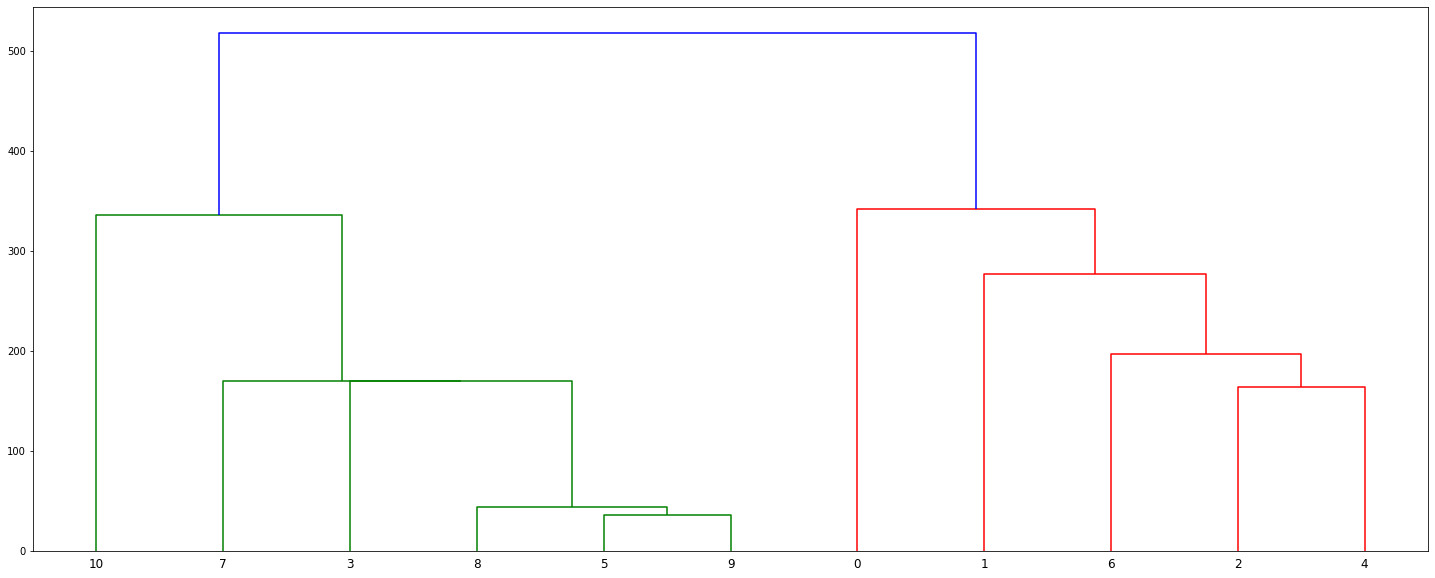

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [39]:
#Complete Linkage
class Dist_Mat_Compute_Comp(object):

    #class to enable the Computation of distance matrix 
    def __init__(self):
        pass
    
    def compute_distance(self,samples):

    #Creates a matrix of distances between individual samples and clusters attained at a particular step
        
        Dist_mat = np.zeros((len(samples),len(samples)))
        for i in range(Dist_mat.shape[0]):
            for j in range(Dist_mat.shape[0]):
                if i!=j:
                    Dist_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Dist_mat[i,j] = 10**4
        return Dist_mat
    
    
    def distance_calculate(self,sample1,sample2):
        
     # Distance calulated between two samples. The two samples can be both samples, both clusters or one cluster and one sample.
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return max(dist)
    
    
    def intersampledist(self,s1,s2):
    
            #To be used in case we have one sample and one cluster.
    
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return max(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return max(dist)

In [23]:
curr_sampl = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Dist_Mat_Compute_Comp()


while m!=2:
    print('Sample size :- ',m)
    Dist_mat      = distcal.compute_distance(samples)
    smpl_indx_reqd = np.where(Dist_mat==Dist_mat.max())[0]
    extracted_vals      = samples.pop(smpl_indx_reqd[1])
    samples[smpl_indx_reqd[0]].append(extracted_vals)
    
    
    curr_sampl[smpl_indx_reqd[0]].append(curr_sampl[smpl_indx_reqd[1]])
    curr_sampl[smpl_indx_reqd[0]] = [curr_sampl[smpl_indx_reqd[0]]]
    v = curr_sampl.pop(smpl_indx_reqd[1])
    m = len(samples)
    
    print("Current Sample :",curr_sampl)
    print('New CLuster Formed  :-',curr_sampl[smpl_indx_reqd[0]])
    print('Updated Sample Size :-',m)
    print('\n')

Sample size :-  11
Current Sample : [[[0, [1]]], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
New CLuster Formed  :- [[0, [1]]]
Current Sample Size :- 10


Sample size :-  10
Current Sample : [[[[0, [1]], [2]]], [3], [4], [5], [6], [7], [8], [9], [10]]
New CLuster Formed  :- [[[0, [1]], [2]]]
Current Sample Size :- 9


Sample size :-  9
Current Sample : [[[[[0, [1]], [2]], [3]]], [4], [5], [6], [7], [8], [9], [10]]
New CLuster Formed  :- [[[[0, [1]], [2]], [3]]]
Current Sample Size :- 8


Sample size :-  8
Current Sample : [[[[[[0, [1]], [2]], [3]], [4]]], [5], [6], [7], [8], [9], [10]]
New CLuster Formed  :- [[[[[0, [1]], [2]], [3]], [4]]]
Current Sample Size :- 7


Sample size :-  7
Current Sample : [[[[[[[0, [1]], [2]], [3]], [4]], [5]]], [6], [7], [8], [9], [10]]
New CLuster Formed  :- [[[[[[0, [1]], [2]], [3]], [4]], [5]]]
Current Sample Size :- 6


Sample size :-  6
Current Sample : [[[[[[[[0, [1]], [2]], [3]], [4]], [5]], [6]]], [7], [8], [9], [10]]
New CLuster Formed  :- [[[[[

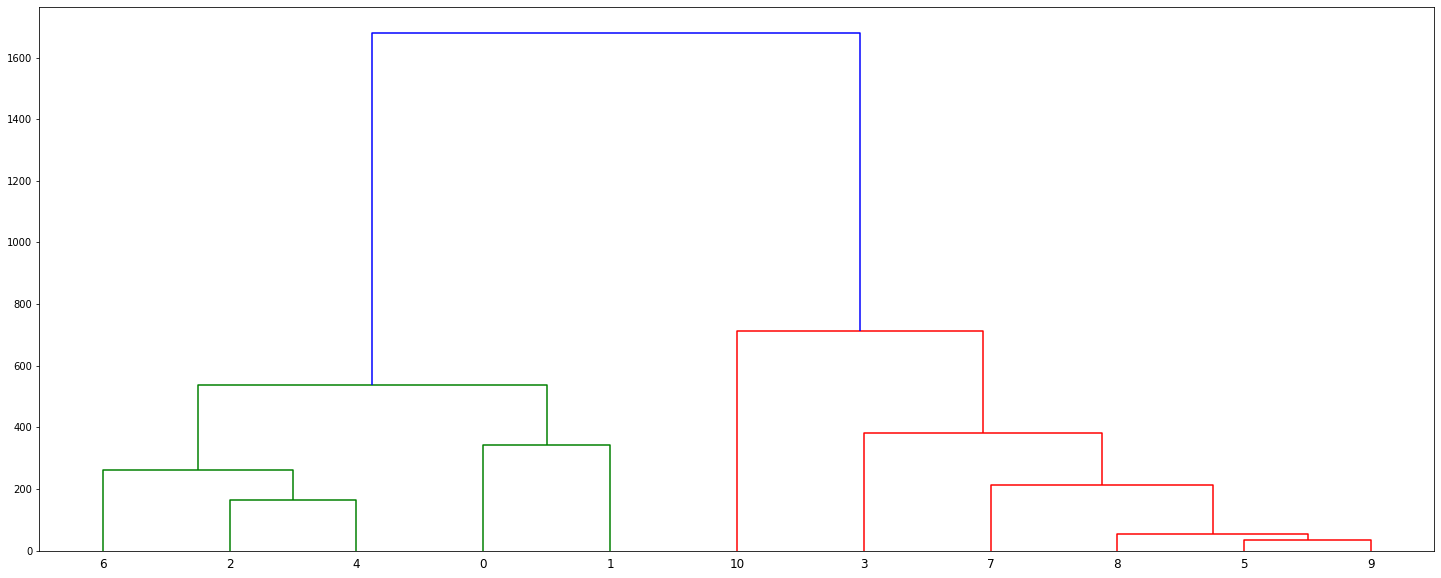

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [41]:
#Average Linkage
class Dist_Mat_Compute_Avg(object):

    #class to enable the Computation of distance matrix 
    def __init__(self):
        pass
    
    def compute_distance(self,samples):

    #Creates a matrix of distances between individual samples and clusters attained at a particular step
        
        Dist_mat = np.zeros((len(samples),len(samples)))
        for i in range(Dist_mat.shape[0]):
            for j in range(Dist_mat.shape[0]):
                if i!=j:
                    Dist_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Dist_mat[i,j] = 10**4
        return Dist_mat
    
    
    def distance_calculate(self,sample1,sample2):
        
     # Distance calulated between two samples. The two samples can be both samples, both clusters or one cluster and one sample.
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return sum(dist)/len(dist)
    
    
    def intersampledist(self,s1,s2):
    
            #To be used in case we have one sample and one cluster.
    
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return sum(dist)/len(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return sum(dist)/len(dist)

In [42]:
curr_sampl = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Dist_Mat_Compute_Avg()


while m!=2:
    print('Sample size    :- ',m)
    Dist_mat      = distcal.compute_distance(samples)
    smpl_indx_reqd = np.where(Dist_mat==Dist_mat.min())[0]
    extracted_vals      = samples.pop(smpl_indx_reqd[1])
    samples[smpl_indx_reqd[0]].append(extracted_vals)
    
    
    curr_sampl[smpl_indx_reqd[0]].append(curr_sampl[smpl_indx_reqd[1]])
    curr_sampl[smpl_indx_reqd[0]] = [curr_sampl[smpl_indx_reqd[0]]]
    v = curr_sampl.pop(smpl_indx_reqd[1])
    m = len(samples)
    
    print('Current Sample :-',curr_sampl)
    print('New Cluster Formed    :-',curr_sampl[smpl_indx_reqd[0]])
    print('Updated Sample Size  :-',m)
    print('\n')

Sample size    :-  11
Current Sample :- [[0], [1], [2], [3], [4], [[5, [9]]], [6], [7], [8], [10]]
New Cluster Formed    :- [[5, [9]]]
Updated Sample Size  :- 10


Sample size    :-  10
Current Sample :- [[0], [1], [2], [3], [4], [[[5, [9]], [8]]], [6], [7], [10]]
New Cluster Formed    :- [[[5, [9]], [8]]]
Updated Sample Size  :- 9


Sample size    :-  9
Current Sample :- [[0], [1], [[2, [4]]], [3], [[[5, [9]], [8]]], [6], [7], [10]]
New Cluster Formed    :- [[2, [4]]]
Updated Sample Size  :- 8


Sample size    :-  8
Current Sample :- [[0], [1], [[2, [4]]], [3], [[[[5, [9]], [8]], [7]]], [6], [10]]
New Cluster Formed    :- [[[[5, [9]], [8]], [7]]]
Updated Sample Size  :- 7


Sample size    :-  7
Current Sample :- [[0], [1], [[[2, [4]], [6]]], [3], [[[[5, [9]], [8]], [7]]], [10]]
New Cluster Formed    :- [[[2, [4]], [6]]]
Updated Sample Size  :- 6


Sample size    :-  6
Current Sample :- [[0], [1], [[[2, [4]], [6]]], [[3, [[[[5, [9]], [8]], [7]]]]], [10]]
New Cluster Formed    :- [[3, [

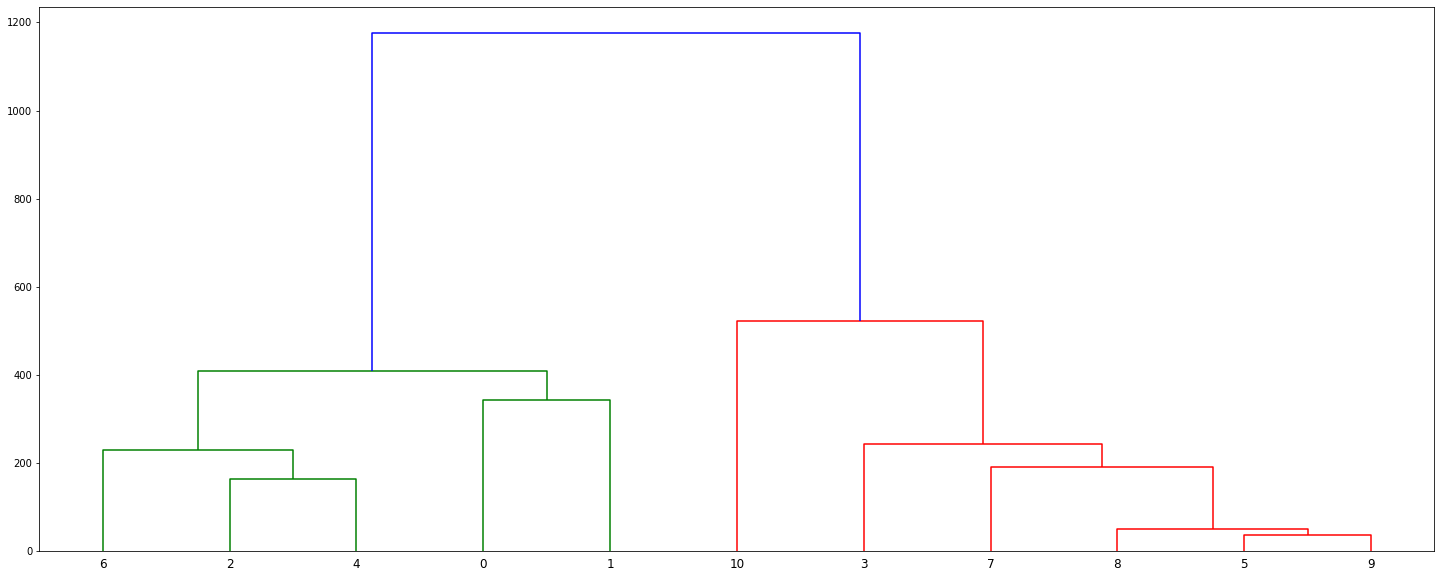

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)